# YRotation (YGate) - Data Analysis

## Configuration

Pulse and fidelity computation are computation intensive (slow).

In [1]:
PULSE_ENABLED = False
FIDELITY_ENABLED = True

Parameters are stored in a shared script.

In [2]:
from parameters import *

Using a shared location for datasets is better.

In [3]:
print('---------------------------------------')
print('List available datasets in', BASE_DIR)
!ls $BASE_DIR
print('---------------------------------------')

---------------------------------------
List available datasets in /home/mb4989/ml4qcontrol/latest_2/ml4quantum_optimal_control_pulse_generation/data_pulse
D1_10_Pmin_200
Makefile
rx_1_guardlevel_sample.csv
rx_sample.csv
ry_random_configfile_config_template_D1_10_Pmin_200.json_randomseed_0001.csv
ry_sample.csv
ry_test_configfile_config_template_D1_10_Pmin_200.json_randomseed_0001.csv
rz_sample.csv
ugate_sample.csv
xrotate_seed_1.csv
---------------------------------------


## Library

In [4]:
import sys
sys.path.append('..')

from utils.helpers import *

## Dataset

### Load

In [5]:
import numpy as np
import pandas as pd
from IPython.display import display

Disable cell scrolling.

Load data that we generated with the _Juqbox.jl_ pulse optimizer and different seeds.

<span style="background-color:orange">How many Juqbox traces/seeds to use? Which granularity for the angles along x, y, and z axes?</span>

In [6]:
csv_files = [
    '{}/{}/ry_test_configfile_config_template_{}.json_randomseed_{:04d}.csv'.format(BASE_DIR, CSV_CONFIG, CSV_CONFIG, i) for i in range(1, N_CSV_FILES+1)
]

csv_test = [
    '{}/{}/ry_random_configfile_config_template_{}.json_randomseed_{:04d}.csv'.format(BASE_DIR, CSV_CONFIG, CSV_CONFIG, i) for i in range(1, N_CSV_FILES+1)
]


df_list = []
df_test_list = []
for f in csv_files:
    df_list.append(pd.read_csv(f, header=None))
for f in csv_test:
    df_test_list.append(pd.read_csv(f, header=None))

In [7]:
print('---------------------------------------')
for i in range(len(csv_files)):
    print(csv_files[i], df_list[i].shape)
print('---------------------------------------')
import os
if (os.path.isfile('../../' + CONFIG_TEMPLATE_JSON)):
    print('[Juqbox configuration] using: ', '../../' + CONFIG_TEMPLATE_JSON)
else:
    print('ERROR: File not found:', '../../' + CONFIG_TEMPLATE_JSON)
print('---------------------------------------')

---------------------------------------
/home/mb4989/ml4qcontrol/latest_2/ml4quantum_optimal_control_pulse_generation/data_pulse/D1_10_Pmin_200/ry_test_configfile_config_template_D1_10_Pmin_200.json_randomseed_0001.csv (16384, 21)
---------------------------------------
[Juqbox configuration] using:  ../../config_template_D1_10_Pmin_200.json
---------------------------------------


Concatenate the data sets.

In [8]:
df = pd.concat(df_list)
df_test = pd.concat(df_test_list)

In [9]:
display(df)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000017,0.000050,0.000067,-0.000036,0.000044,0.000033,-0.000092,0.000045,0.000074,0.000141,...,0.012269,0.012821,0.012799,0.012866,0.012891,0.012891,0.012874,0.012038,0.009299,-3.141593
1,0.000017,0.000050,0.000067,-0.000036,0.000044,0.000033,-0.000092,0.000045,0.000074,0.000141,...,0.012268,0.012819,0.012797,0.012865,0.012889,0.012889,0.012873,0.012036,0.009298,-3.141209
2,0.000017,0.000050,0.000067,-0.000036,0.000044,0.000034,-0.000092,0.000045,0.000074,0.000141,...,0.012267,0.012818,0.012796,0.012863,0.012887,0.012887,0.012871,0.012034,0.009297,-3.140826
3,0.000017,0.000050,0.000067,-0.000036,0.000044,0.000034,-0.000092,0.000045,0.000074,0.000141,...,0.012266,0.012816,0.012794,0.012862,0.012886,0.012886,0.012870,0.012032,0.009295,-3.140442
4,0.000017,0.000050,0.000067,-0.000036,0.000044,0.000034,-0.000092,0.000045,0.000074,0.000141,...,0.012265,0.012814,0.012792,0.012860,0.012884,0.012884,0.012868,0.012030,0.009294,-3.140059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.000015,0.000041,0.000051,-0.000047,0.000024,0.000016,-0.000096,0.000033,0.000064,0.000128,...,-0.012100,-0.012937,-0.012954,-0.012902,-0.012883,-0.012883,-0.012896,-0.012092,-0.008566,3.140059
16380,0.000015,0.000041,0.000051,-0.000047,0.000024,0.000016,-0.000096,0.000033,0.000064,0.000128,...,-0.012102,-0.012938,-0.012955,-0.012903,-0.012885,-0.012885,-0.012897,-0.012093,-0.008567,3.140442
16381,0.000015,0.000041,0.000051,-0.000047,0.000024,0.000016,-0.000096,0.000033,0.000064,0.000128,...,-0.012103,-0.012940,-0.012957,-0.012905,-0.012886,-0.012886,-0.012899,-0.012095,-0.008568,3.140826
16382,0.000015,0.000041,0.000051,-0.000047,0.000024,0.000016,-0.000096,0.000033,0.000064,0.000128,...,-0.012105,-0.012941,-0.012958,-0.012906,-0.012888,-0.012888,-0.012900,-0.012097,-0.008569,3.141209


In [10]:
display(df_test)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000007,0.000016,0.000021,-0.000028,0.000016,0.000011,-0.000055,0.000004,0.000009,0.000062,...,0.002790,0.002438,0.002406,0.002505,0.002541,0.002541,0.002517,0.002743,0.003877,-0.651536
1,0.000014,0.000033,0.000047,-0.000055,0.000026,0.000017,-0.000110,0.000025,0.000055,0.000137,...,-0.010897,-0.011381,-0.011407,-0.011329,-0.011301,-0.011301,-0.011319,-0.010890,-0.008923,2.787041
2,0.000016,0.000040,0.000059,-0.000058,0.000037,0.000024,-0.000125,0.000027,0.000057,0.000156,...,0.010260,0.010226,0.010189,0.010302,0.010343,0.010344,0.010316,0.010154,0.010048,-2.564678
3,-0.000003,-0.000025,-0.000014,-0.000043,0.000013,0.000022,-0.000029,0.000032,0.000036,0.000063,...,-0.000686,-0.000002,-0.000033,0.000063,0.000097,0.000098,0.000074,-0.000685,-0.003168,0.059777
4,0.000009,0.000017,0.000031,-0.000049,0.000026,0.000020,-0.000089,0.000016,0.000030,0.000110,...,-0.006228,-0.006108,-0.006143,-0.006037,-0.005999,-0.005999,-0.006024,-0.006210,-0.006806,1.530087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,0.000011,0.000023,0.000041,-0.000056,0.000033,0.000025,-0.000107,0.000023,0.000043,0.000136,...,-0.008161,-0.008101,-0.008138,-0.008027,-0.007987,-0.007987,-0.008014,-0.008149,-0.008449,2.021488
16380,-0.000002,-0.000021,-0.000011,-0.000044,0.000012,0.000020,-0.000033,0.000032,0.000038,0.000066,...,-0.001478,-0.000923,-0.000955,-0.000856,-0.000821,-0.000820,-0.000844,-0.001477,-0.003467,0.276569
16381,0.000016,0.000044,0.000060,-0.000047,0.000036,0.000026,-0.000105,0.000038,0.000069,0.000144,...,0.011675,0.012083,0.012057,0.012137,0.012165,0.012166,0.012146,0.011539,0.009516,-2.976594
16382,0.000009,0.000013,0.000030,-0.000058,0.000027,0.000024,-0.000095,0.000031,0.000052,0.000128,...,-0.008591,-0.008779,-0.008810,-0.008716,-0.008682,-0.008682,-0.008704,-0.008584,-0.007927,2.166975


In [11]:
N_ANGLES = 1
N_PARAMS = df.shape[1]-N_ANGLES
#np.save("./data/ygate/{}/N_PARAMS.npy".format(CSV_CONFIG), N_PARAMS)
#print(N_PARAMS)
print('---------------------------------------')
print('Data set shape', df.shape)
print('- Entries              #', df.shape[0])
print('- Pulse parameters (y) #', N_PARAMS) # ASSUMING 3 BETA VALUES (ANGLES ALONG X, Y, Z AXES)
print('- Gate parameters  (x) #', N_ANGLES) # ASSUMING 3 BETA VALUES (ANGLES ALONG X, Y, Z AXES)
print('---------------------------------------')

---------------------------------------
Data set shape (16384, 21)
- Entries              # 16384
- Pulse parameters (y) # 20
- Gate parameters  (x) # 1
---------------------------------------


Get maximum and minimum values for the alpha values that may help with plotting and such.

In [12]:
max_pparam_value = np.max(df.values[:,:N_PARAMS])
min_pparam_value = np.min(df.values[:,:N_PARAMS])

### Split

In [13]:
import tensorflow as tf
print('Tensorflow ver.', tf.__version__)

Tensorflow ver. 2.4.0


Use the least change b/w neighbors method (greedy) or the average method as attempts to reduce noisy behavior

In [14]:
from sklearn.model_selection import train_test_split

Dataset split is 60%-20%-20% training-validation-test set. We use a constant state (seed) for reproducible splits across multiple runs.

In [15]:
x_test = df_test.iloc[:,N_PARAMS:N_PARAMS+N_ANGLES]
y_test = df_test.iloc[:,:N_PARAMS]
x_train, x_val, y_train, y_val = train_test_split(df.iloc[:,N_PARAMS:N_PARAMS+N_ANGLES], df.iloc[:,:N_PARAMS], test_size=0.25, random_state=1, shuffle=True)

In [16]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(12288, 1)
(4096, 1)
(16384, 1)


Let's have a look at the gate parameters (angles / betas) from the test set.

In [17]:
print('---------------------------------------')
print(x_test)
print('---------------------------------------')

---------------------------------------
             20
0     -0.651536
1      2.787041
2     -2.564678
3      0.059777
4      1.530087
...         ...
16379  2.021488
16380  0.276569
16381 -2.976594
16382  2.166975
16383 -0.737598

[16384 rows x 1 columns]
---------------------------------------


Let's have a look at the pulse parameters (alphas). Only the first element in the test set.

In [18]:
total = df.shape[0]
print('---------------------------------------')
print('Train set shape: {}, {:.2f}%'.format(y_train.shape, (y_train.shape[0]*100.)/total))
print('Validation set shape: {}, {:.2f}%'.format(y_val.shape, (y_val.shape[0]*100.)/total))
print('Test set shape: {}, {:.2f}%'.format(y_test.shape, (y_test.shape[0]*100.)/total))
print('---------------------------------------')

---------------------------------------
Train set shape: (12288, 20), 75.00%
Validation set shape: (4096, 20), 25.00%
Test set shape: (16384, 20), 100.00%
---------------------------------------


### Save

Always good to save the split data set for future reference.

In [19]:
!mkdir -p ./data/yrotation/$CSV_CONFIG 
np.save('./data/yrotation/{}/x_train.npy'.format(CSV_CONFIG), x_train)
np.save('./data/yrotation/{}/x_val.npy'.format(CSV_CONFIG), x_val)
np.save('./data/yrotation/{}/x_test.npy'.format(CSV_CONFIG), x_test)
np.save('./data/yrotation/{}/y_train.npy'.format(CSV_CONFIG), y_train)
np.save('./data/yrotation/{}/y_val.npy'.format(CSV_CONFIG), y_val)
np.save('./data/yrotation/{}/y_test.npy'.format(CSV_CONFIG), y_test)
print('Data saved in ./data/yrotation/{}/'.format(CSV_CONFIG))

Data saved in ./data/yrotation/D1_10_Pmin_200/


### Visualize

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

Overall pulse parameter distribution.

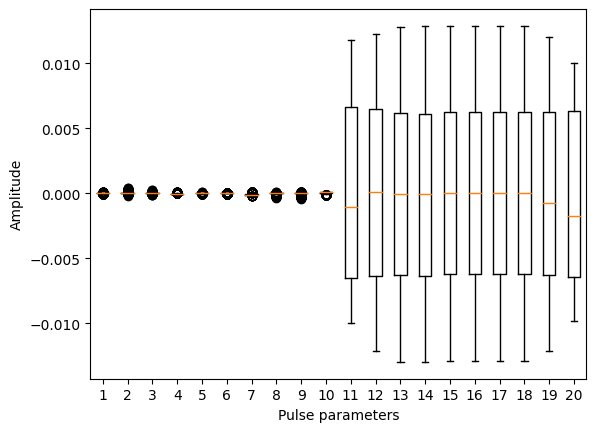

In [21]:
_ = plt.boxplot(df.iloc[:,:N_PARAMS], showfliers=True)
#_ = plt.boxplot(y_cleaned, showfliers=True)
_ = plt.ylabel('Amplitude')
_ = plt.xlabel('Pulse parameters')

Creates an animation to display the pulse parameters for different gate params

In [22]:
## Needs ffmpeg. Install using "conda install -c conda-forge ffmpeg"
start_idx = x_test.shape[0]-2100
num_frames = 500
frame_interval_ms = 50

# get x and y
x = np.arange(1, N_PARAMS+1, 1)
y = df.iloc[start_idx:start_idx+num_frames,:N_PARAMS].to_numpy()
#y = y_cleaned[start_idx:start_idx+num_frames]
beta = df.iloc[start_idx:start_idx+num_frames,N_PARAMS:].to_numpy()
#beta = beta_cleaned[start_idx:start_idx+num_frames]

# create a figure and an axis object
plt.ioff()
fig, ax = plt.subplots()

# set labels and plot limits
plt.ylabel('Pulse parameter values')
plt.xlabel('Pulse parameters (α[1:{}])'.format(N_PARAMS))
plt.ylim([min_pparam_value, max_pparam_value*5/4])
plt.xticks(x, x)

# initialize an empty line object
line, = ax.plot([], [], marker='o', linestyle='--', color='r')

# create a text object inside the axes
title = ax.text(0.05, 0.9, "", transform=ax.transAxes)

# define a function that updates the line object for each frame
def animate(i):
    title.set_text(f"Beta: {beta[i]}")
    # update line data
    line.set_data(x, y[i])
    return line,

# create an animation object using FuncAnimation
anim = animation.FuncAnimation(fig, animate,
                              frames=num_frames,
                              interval=frame_interval_ms,
                              repeat=False)

# show the animation
%matplotlib inline
HTML(anim.to_html5_video())

This is the first entry in the dataset.

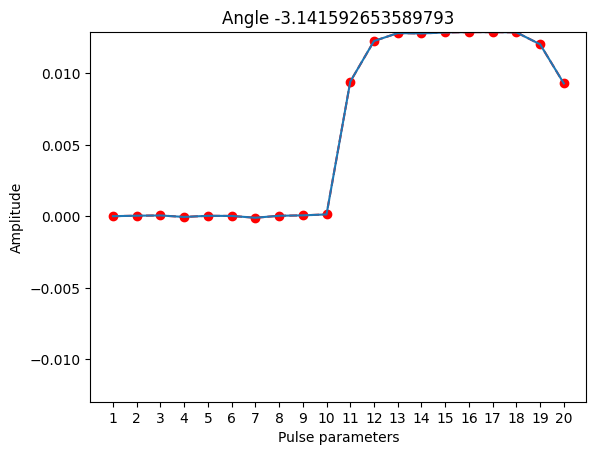

In [23]:
entry_id = 0

x = np.arange(1, N_PARAMS+1, 1)
y = df.iloc[entry_id:entry_id+1,:N_PARAMS].to_numpy()[0]
angle = df.iloc[entry_id:entry_id+1,N_PARAMS:N_PARAMS+1].to_numpy()[0][0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.title('Angle {}'.format(angle))
plt.ylabel('Amplitude')
plt.xlabel('Pulse parameters')
plt.ylim([min_pparam_value, max_pparam_value])
plt.show()

In [24]:
if PULSE_ENABLED:
    x = df.iloc[entry_id:entry_id+1,N_PARAMS:N_PARAMS+N_ANGLES].to_numpy()[0]
    y = df.iloc[entry_id:entry_id+1,:N_PARAMS].to_numpy()[0]

    plot_ygate_pulse(x, y, verbose=True)

This is the second entry in the dataset.

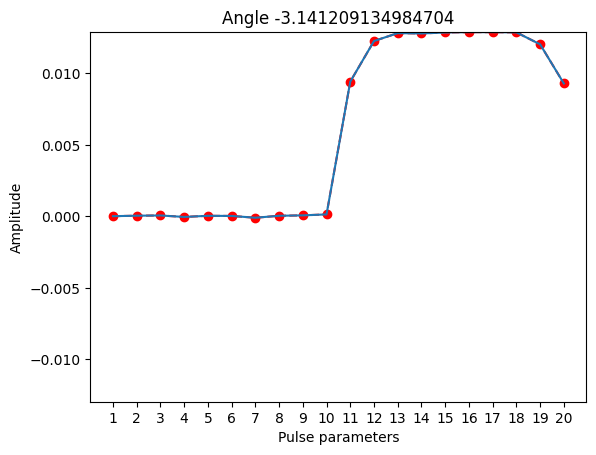

In [25]:
entry_id = 1

x = np.arange(1, N_PARAMS+1, 1)
y = df.iloc[entry_id:entry_id+1,:N_PARAMS].to_numpy()[0]
angle = df.iloc[entry_id:entry_id+1,N_PARAMS:N_PARAMS+1].to_numpy()[0][0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.title('Angle {}'.format(angle))
plt.ylabel('Amplitude')
plt.xlabel('Pulse parameters')
plt.ylim([min_pparam_value, max_pparam_value])
plt.show()

In [26]:
if PULSE_ENABLED:
    x = df.iloc[entry_id:entry_id+1,20:23].to_numpy()[0]
    y = df.iloc[entry_id:entry_id+1,:20].to_numpy()[0]

    plot_ygate_pulse(x, y, verbose=False)

Plot all of the entries in the dataset. It may take time, so disable it by default.

Fidelity of the train, validation, and test set.

<span style="color:red">ATTENTION: Measuring fidelity on the entire train, validation, and test sets could be time consuming. Use `limit` parameter in case.</span>

In [27]:
%%time
if FIDELITY_ENABLED:
    # Using some hash to avoid name collision
    import random
    hash_id = random.getrandbits(32)

    ygate_fidelity_train = get_ygate_fidelity(x_train.values,
                                              y_train.values,
                                              limit=len(x_train.values),
                                              config_template=CONFIG_TEMPLATE_JSON,
                                              pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                              output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))
    ygate_fidelity_val = get_ygate_fidelity(x_val.values,
                                            y_val.values,
                                            limit=len(x_val.values),
                                            config_template=CONFIG_TEMPLATE_JSON,
                                            pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                            output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))
    ygate_fidelity_test = get_ygate_fidelity(x_test.values,
                                             y_test.values,
                                             limit=len(x_test.values),
                                             config_template=CONFIG_TEMPLATE_JSON,
                                             pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                             output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))

    print('---------------------------------------')
    print('Config:', CONFIG_TEMPLATE_JSON)
    print('CSV file count:', N_CSV_FILES)
    print('Fidelity:')
    print('- train set:', ygate_fidelity_train)
    print('- test set:', ygate_fidelity_val)
    print('- val set:', ygate_fidelity_test)
    print('---------------------------------------')
else:
    ygate_fidelity_train = -1
    ygate_fidelity_val = -1
    ygate_fidelity_test = -1
    
    print('---------------------------------------')
    print('YGate fidelity: DISABLED')
    print('---------------------------------------')

---------------------------------------
Config: config_template_D1_10_Pmin_200.json
CSV file count: 1
Fidelity:
- train set: 0.9999997171486532
- test set: 0.9999997077720383
- val set: 0.9999997160252487
---------------------------------------
CPU times: user 684 ms, sys: 44 ms, total: 728 ms
Wall time: 1min 33s


As long as we use the same CSV files and same amount of them and the same `config_template_*.json` file (same Juqbox knobs), we should get the same values of fidelity.

|Config|granularity|CSV file count|train fidelity|test fidelity|val fidelity|notes|
|--|:--:|--:|:--|:--|:--|:--:|
|config_template_D1_10_Pmin_40.json|100|1|0.9992537820974491|0.9992047532282389|0.99915675532328|Older data|
|config_template_D1_10_Pmin_200.json|524288|1|0.9999790739188936|0.9999774997248378|0.9999779315427384|`limit=1000`|
|config_template_D1_10_Pmin_200.json|524288|1|0.9999781575811475|0.9999781817196898|0.9999782386830239||

### Debug

Debugging of the `get_ygate_fidelity` function.

In [28]:
x0 = x_train.values[0]
y0 = y_train.values[0]

x1 = x_train.values[1]
y1 = y_train.values[1]

x1_list = [x0, x1]
y1_list = [y0, y1]
x2_list = [x0, x1]*2
y2_list = [y0, y1]*2
x3_list = [x0, x1]*3
y3_list = [y0, y1]*3
x4_list = [x0, x1]*4
y4_list = [y0, y1]*4

print('---------------------------------------')
print(x0)
print(y0)
print('---------------------------------------')
print(x1)
print(y1)
print('---------------------------------------')
# print(x1_list)
# print(y1_list)
# print(x2_list)
# print(y2_list)
# print(x3_list)
# print(y3_list)
# print(x4_list)
# print(y4_list)
#print('---------------------------------------')

---------------------------------------
[-1.83724588]
[ 9.67168893e-06  2.20306598e-05  3.41826076e-05 -4.08382572e-05
  2.34986936e-05  1.55494254e-05 -8.50009297e-05  1.01915871e-05
  2.56112541e-05  9.95711618e-05  6.53269623e-03  7.23429536e-03
  7.38918697e-03  7.36087751e-03  7.44792889e-03  7.47911124e-03
  7.47929118e-03  7.45816807e-03  7.16108881e-03  6.53880579e-03]
---------------------------------------
[1.07979663]
[ 1.59774586e-06 -3.92952095e-06  3.32501266e-06 -2.69635075e-05
  1.18840994e-05  1.33011406e-05 -3.35786531e-05  1.36205613e-05
  1.80733849e-05  4.97163449e-05 -3.22243893e-03 -4.02928867e-03
 -4.49996630e-03 -4.52263588e-03 -4.45293712e-03 -4.42800920e-03
 -4.42784511e-03 -4.44470321e-03 -4.02546140e-03 -3.17390200e-03]
---------------------------------------


In [29]:
if FIDELITY_ENABLED:
    # Using some hash to avoid name collision
    import math
    import random
    hash_id = random.getrandbits(32)
    
    print('---------------------------------------')
    #Zeqi: We expect the following 4 lines to give us same fidelity, but they do not.
    #GDG: After applying Andy's fix, the first fidelity measurament is still different in the last decimal point. Is this some rounding error? Using math.isclose() instead...
    fidelity_1 = get_ygate_fidelity(x1_list, y1_list,
                                    config_template=CONFIG_TEMPLATE_JSON,
                                    pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                    output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))
    fidelity_2 = get_ygate_fidelity(x2_list, y2_list,
                                    config_template=CONFIG_TEMPLATE_JSON,
                                    pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                    output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))
    fidelity_3 = get_ygate_fidelity(x3_list, y3_list,
                                    config_template=CONFIG_TEMPLATE_JSON,
                                    pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                    output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))
    fidelity_4 = get_ygate_fidelity(x4_list, y4_list,
                                    config_template=CONFIG_TEMPLATE_JSON,
                                    pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                    output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))
    fidelities = [fidelity_1, fidelity_2, fidelity_3, fidelity_4]

    #if (all(x == fidelities[0] for x in fidelities)):
    if (all(math.isclose(x, fidelities[0]) for x in fidelities)):
        print('Test: PASS')
    else:
        print('Test: FAIL')

    print(fidelity_1)
    print(fidelity_2)
    print(fidelity_3)
    print(fidelity_4)
    
    print('---------------------------------------')
    #Zeqi: Produce the first one again to make sure the fedility is not randomized.
    fidelity_1b = get_ygate_fidelity(x1_list, y1_list,
                                    config_template=CONFIG_TEMPLATE_JSON,
                                    pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                    output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))
    if (fidelity_1 == fidelity_1b):
        print('Test: PASS')
    else:
        print('Test: FAIL')        
        
    print(fidelity_1b)

    print('---------------------------------------')
    #Zeqi: Another bug: if there is only one point, the fedility is nan.
    fidelity_0 = get_ygate_fidelity([x0,], [y0,],
                                    config_template=CONFIG_TEMPLATE_JSON,
                                    pulse_data_path='/tmp/ygate_{:x}.csv'.format(hash_id),
                                    output_objf_path='/tmp/ygate_fidelity_{:x}.csv'.format(hash_id))
    import math
    if (fidelity_0 != None and not math.isnan(fidelity_0)):
        print('Test: PASS')
    else:
        print('Test: FAIL')        
        
    print(fidelity_0)

---------------------------------------
Test: PASS
0.9999999561177387
0.9999999561177387
0.9999999561177387
0.9999999561177387
---------------------------------------
Test: PASS
0.9999999561177387
---------------------------------------
Test: PASS
0.9999999206465653
